In [1]:
import os, math
import numpy as np
import pandas as pd
import seaborn as sns
import sys, os
sys.path.append('../misc')
sys.path.append('../models')
from helpers import *
import xgboost as xgb

%matplotlib inline
import time
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import pandas as pd

from sklearn import svm
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.metrics import log_loss
from models import *
from helpers import *
import pandas as pd

train1 = pd.read_csv('../data/training_SeparateText.csv')
train2 = pd.read_csv('../data/test_filtered_SeparateText.csv')
train_full = pd.concat([train1, train2])
train_full = train_full.sort_values('ID').reset_index(drop=True)


train_full = get_gene_feature(get_var_feature(train_full))

test_full = pd.read_csv('../data/sub_SeparateText.csv')
test_full = get_gene_feature(get_var_feature(test_full))

print(train_full.shape)
print(test_full.shape) 

//anaconda/envs/cancer/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
//anaconda/envs/cancer/lib/python3.6/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
//anaconda/envs/cancer/lib/python3.6/site-packages/sklearn/lda.py:6: DeprecationWarning: lda.LDA has been moved to discriminant_analysis.LinearDiscriminantAnalysis in 0.17 and will be removed in 0.19
  "in 0.17 and will be removed in 0.19", DeprecationWarnin

(3689, 29)
(986, 28)


In [7]:
#y_train = train_full['Class']-1

pl = GeneVar().fit_feature(train_full)
X_train = GeneVar().get_feature(pl, train_full)
X_test = GeneVar().get_feature(pl, test_full)


gene_var model


../models/models.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data_full[c][data_full[c].notnull()] = data_full[c][data_full[c].notnull()].apply(lambda x:' '.join(x))
../models/models.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data_full[c][data_full[c].isnull()] = 'nan'


Index(['ID', 'Gene', 'Variation', 'Class', 'Text', 'SeparateText', 'amino1',
       'amino2', 'amp', 'del', 'dup', 'egfr', 'exon', 'fus', 'ins', 'over',
       'pos', 'promo', 'replace', 'splice', 'trunc', 'alias_name',
       'gene_family', 'location', 'locus_group', 'locus_type', 'name',
       'prev_name', 'symbol', 'location_1', 'location_2', 'location_3',
       'describe'],
      dtype='object')
(3689, 33)
gene_var model


../models/models.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data_full[c][data_full[c].notnull()] = data_full[c][data_full[c].notnull()].apply(lambda x:' '.join(x))
../models/models.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data_full[c][data_full[c].isnull()] = 'nan'


gene_var model


In [10]:
np.save('../data/train_gene_matrix.npy', X_train)
np.save('../data/test_gene_matrix.npy', X_test)

In [5]:
params = {
        'eta': 0.03333,
        'max_depth': 10,
        'min_child_weight': 1,
        'gamma': 5,
        'objective': 'multi:softprob',
        'eval_metric': 'mlogloss',
        'num_class': 9,
        'seed': 0,
        'silent': True
    }

watchlist = [(xgb.DMatrix(X_train, y_train), 'train'), (xgb.DMatrix(X_test, y_test), 'valid')]
model = xgb.train(params, xgb.DMatrix(X_train, y_train), 1000,  watchlist, verbose_eval=50, early_stopping_rounds=100)

[0]	train-mlogloss:2.13388	valid-mlogloss:2.14896
Multiple eval metrics have been passed: 'valid-mlogloss' will be used for early stopping.

Will train until valid-mlogloss hasn't improved in 100 rounds.
[50]	train-mlogloss:1.18626	valid-mlogloss:1.34399
[100]	train-mlogloss:1.03978	valid-mlogloss:1.20545
[150]	train-mlogloss:1.01802	valid-mlogloss:1.18376
[200]	train-mlogloss:1.00608	valid-mlogloss:1.17263
[250]	train-mlogloss:1.00276	valid-mlogloss:1.16904
[300]	train-mlogloss:1.00189	valid-mlogloss:1.16819
[350]	train-mlogloss:1.00174	valid-mlogloss:1.1678
[400]	train-mlogloss:1.00087	valid-mlogloss:1.16673
[450]	train-mlogloss:1.00081	valid-mlogloss:1.16666
[500]	train-mlogloss:1.00081	valid-mlogloss:1.16664
[550]	train-mlogloss:1.00081	valid-mlogloss:1.16663
[600]	train-mlogloss:1.00081	valid-mlogloss:1.16663
[650]	train-mlogloss:1.00081	valid-mlogloss:1.16663
[700]	train-mlogloss:1.00081	valid-mlogloss:1.16663
Stopping. Best iteration:
[640]	train-mlogloss:1.00081	valid-mlogloss:

In [6]:
#Evaluate
y_train_prob = model.predict(xgb.DMatrix(X_train), ntree_limit=model.best_ntree_limit)
y_test_prob = model.predict(xgb.DMatrix(X_test), ntree_limit=model.best_ntree_limit)
log_loss(y_test, y_test_prob, eps=1e-15, normalize=True, labels = list(range(9)))

1.1666274690986576

gene_var model
gene_var model


/Users/yao/Desktop/ML/cancer/I_vote_for_cancer/models.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data_full[c][data_full[c].notnull()] = data_full[c][data_full[c].notnull()].apply(lambda x:' '.join(x))
/Users/yao/Desktop/ML/cancer/I_vote_for_cancer/models.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data_full[c][data_full[c].isnull()] = 'nan'


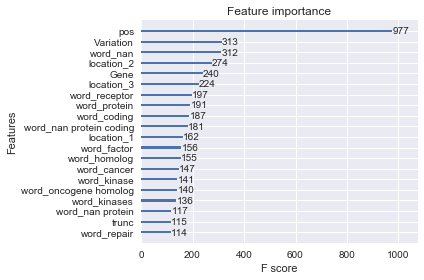

In [9]:
ax = xgb.plot_importance(model, height=0.2, max_num_features=20)

a = GeneVar().get_feature_list(GeneVar()._preprocess(train_full))
tfidf = pl.named_steps['tokenize'].transformer_list[1][1].named_steps['tfidf']
mi = pl.named_steps['tokenize'].transformer_list[1][1].named_steps['mi']
b = ['word_'+tfidf.get_feature_names()[i] for i in mi.get_support(indices=True)]
features = a+b

#f_index = [12, 1, 21, 23, 22, 50, 0, 36, 28, 37, 43, 45, 19, 20, 3, 16, 42, 46, 26, 40]
f_index = [12, 1, 48, 19, 0, 20, 59, 55, 23, 50, 18, 37, 45, 22, 46, 52, 47, 49, 16, 62]
           
labels = [features[i] for i in f_index][::-1]

ax.set_yticklabels(labels)
plt.tight_layout()
#plt.savefig('./input/importance.pdf',dpi=300)

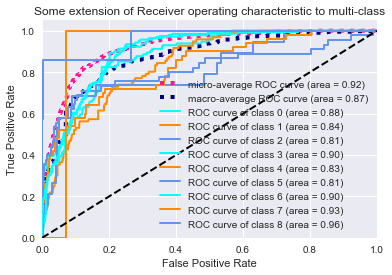

In [11]:
plot_roc_curve(preprocessing.label_binarize(y_test, classes=range(9)), y_test_prob)